In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install shap
!pip install catboost

In [50]:
import glob ## To read the file name
import os  ## To read the file name
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## For data transformation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## machine learning libary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,matthews_corrcoef, confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB

## for model explainability
import shap

#### Reading the data

In [93]:
data = pd.read_csv('/content/drive/MyDrive/Pishing/dataset_full.csv')

In [94]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


We are going to explore the data to gather some relevant information from it.

* The shape of the data

* Data types in the data

* Duplicate values check

* Missing values check

#### Shape of the data

In [95]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [96]:
print('The shape of the data is {}'.format(data.shape))

The shape of the data is (88647, 112)


**Observation**

* The total observations is close to 89K data point.

* We have 112 features in the dataset.

#### DataTypes

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


**Observation**

* We have 111 integer features and 1 numerical feature.

#### Check for Duplicate values

In [98]:
data[data.duplicated()]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
596,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
1267,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
2614,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
3214,3,2,0,6,1,3,0,2,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
3548,2,0,1,2,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88363,2,0,0,0,0,0,0,0,0,0,...,-1,2,1,-1,0,-1,0,0,0,0
88365,2,0,0,0,0,0,0,0,0,0,...,-1,0,0,-1,0,-1,-1,-1,0,0
88387,2,1,0,6,1,3,0,2,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
88405,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0


**Observation**

* we have 1438 duplicate observations in the dataset.

#### Remove the duplicate observations

In [99]:
data = data.drop_duplicates().reset_index(drop=True)

#### Missing values

In [100]:
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [101]:
data.isnull().sum().sum()

0

**Observation**

* There is no missing values present in the dataset.

### EDA

We are going to explore the data.

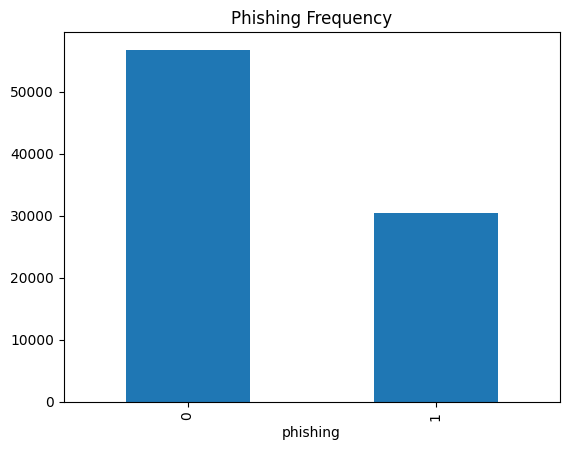

In [102]:
plt.title('Phishing Frequency')
data['phishing'].value_counts().plot(kind='bar');

In [103]:
redundant_features = [col for col in data.columns if data[col].nunique() == 1]

In [104]:
len(redundant_features)

13

In [62]:
ls_10_col = [col for col in data.columns if data[col].nunique() <= 10 and not data[col].nunique() == 1]

In [92]:
len(ls_10_col)

53

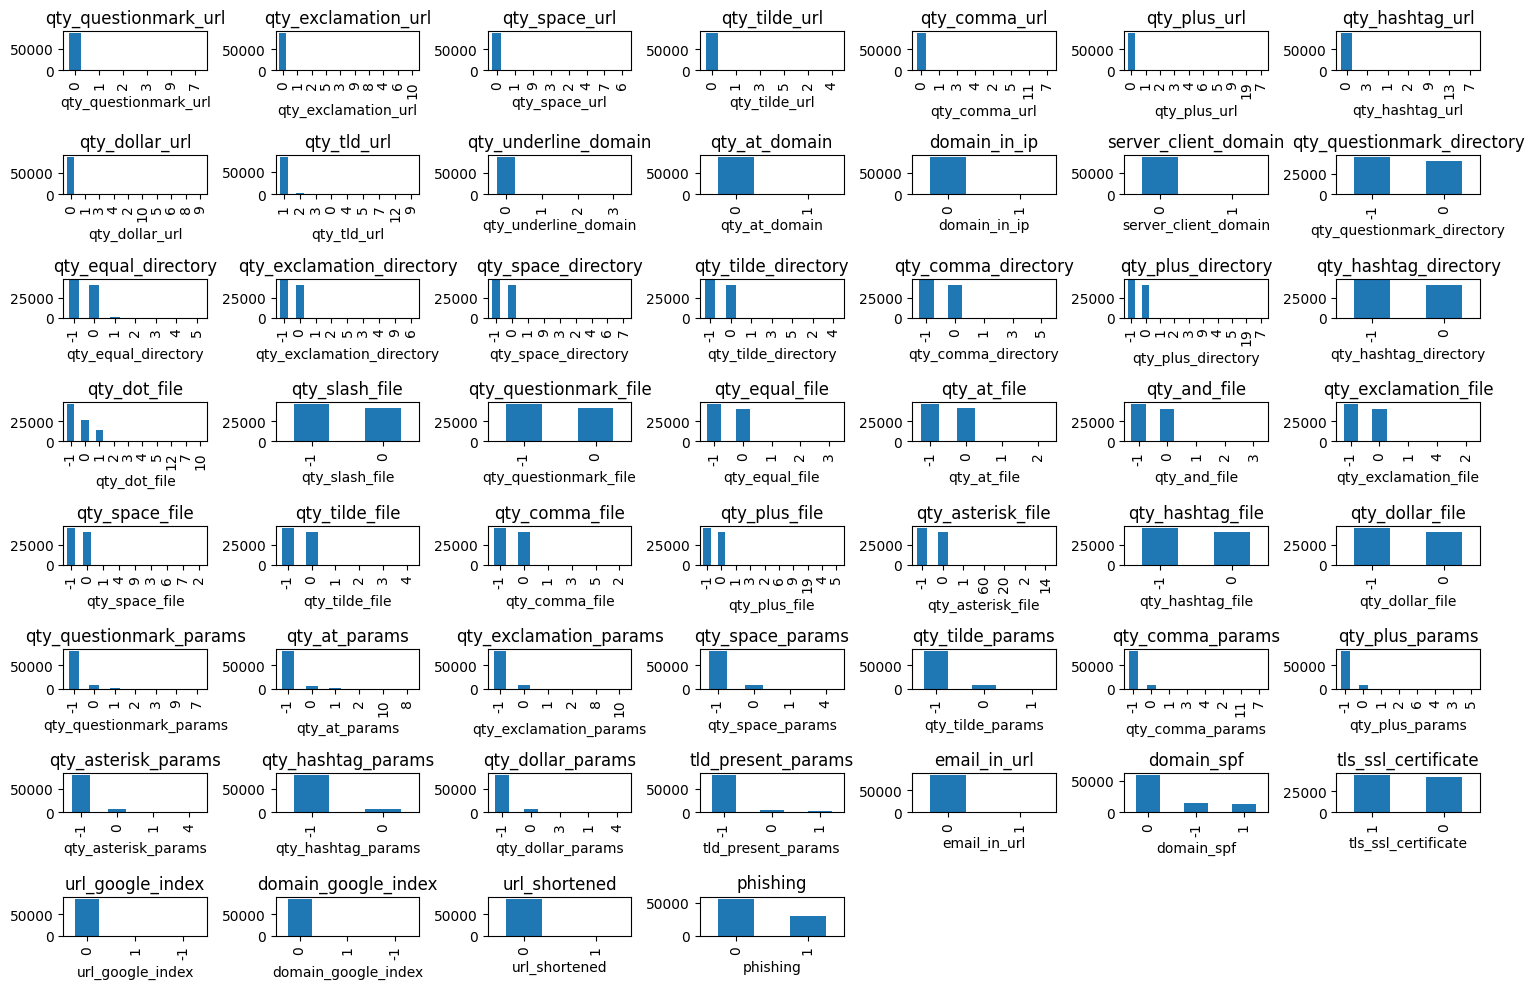

In [64]:
n_cols = len(ls_10_col)
fig, axs = plt.subplots(nrows=(n_cols // 7) + 1, ncols=7, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i, col in enumerate(ls_10_col):
    data[col].value_counts().plot(kind='bar', ax=axs[i])  # Plot directly on each subplot
    axs[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

In [65]:
ls_10_col[:13]

['qty_questionmark_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_tld_url',
 'qty_underline_domain',
 'qty_at_domain',
 'domain_in_ip',
 'server_client_domain']

**Observation**

* We observe a lot of over and under representation of attributes in qty_questionmark_url,
 qty_exclamation_url,
 qty_space_url,
 qty_tilde_url,
 qty_comma_url,
 qty_plus_url,
 qty_hashtag_url,
 qty_dollar_url,
 qty_tld_url,
 qty_underline_domain,
 qty_at_domain,
 domain_in_ip,
 server_client_domain

In [66]:
gs_10_col = [col for col in data.columns if data[col].nunique() > 10]

In [67]:
len(gs_10_col)

46

**Observation**

* We have 53 features with values category less than or equal to 10

* We have 46 features with values category greather than 10

* We have 13 redudant features.

In [68]:
len(redundant_features)

13

#### Data Cleaning

In this section, we are going to drop the redudant features from the features.

In [69]:
data = data.drop(redundant_features, axis=1)

#### Machine Learning

In [70]:
X = data.drop('phishing', axis=1)
y = data['phishing']

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.2, random_state=10, stratify=y)

In [72]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_valid.shape))
print('Shape of the y_test {}'.format(y_valid.shape))

Shape of the X_train (69767, 98)
Shape of the y_train (69767,)
Shape of the X_test (17442, 98)
Shape of the y_test (17442,)


In [73]:
ml_models = [LogisticRegression(),
         GaussianNB(),
         RidgeClassifier(random_state=101),
             DecisionTreeClassifier(random_state=101),
        RandomForestClassifier(random_state=101 ,max_features='auto', class_weight='balanced'),
        CatBoostClassifier(eval_metric='Accuracy', metric_period=20, logging_level='Silent', random_seed=101),
         XGBClassifier()]

names = ['Logistic_Regression','Guassian','Ridge','Decision_Tree','RandomForest','Catboost', 'Xgboost']
f1_score_list = []
accuracy_list = []
mcc_list = []

In [74]:
for name in ml_models:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    acc_score = accuracy_score(y_valid,y_pred)
    accuracy_list.append(acc_score)
    f1_scores= f1_score(y_valid,y_pred)
    f1_score_list.append(f1_scores)
    mcc_score= matthews_corrcoef(y_valid,y_pred)
    mcc_list.append(mcc_score)

In [75]:
model_performance = pd.DataFrame({'Model': names,
                                  'Accuracy_score':accuracy_list,
                           'F1_score': f1_score_list,
                                 'MCC': mcc_list})

In [76]:
model_performance

,Model,Accuracy_score,F1_score,MCC
0,Logistic_Regression,0.881608,0.818142,0.735538
1,Guassian,0.841417,0.736220,0.644521
2,Ridge,0.912166,0.883196,0.818503
3,Decision_Tree,0.956542,0.937869,0.904453
4,RandomForest,0.971104,0.958763,0.936527
5,Catboost,0.972022,0.959993,0.938482
6,Xgboost,0.969327,0.956252,0.932644


In [77]:
model_performance = model_performance.sort_values(by='F1_score', ascending=False)

In [78]:
model_performance['F1_score'] = model_performance['F1_score'].round(4) * 100

In [79]:
model_performance

,Model,Accuracy_score,F1_score,MCC
5,Catboost,0.972022,96.00,0.938482
4,RandomForest,0.971104,95.88,0.936527
6,Xgboost,0.969327,95.63,0.932644
3,Decision_Tree,0.956542,93.79,0.904453
2,Ridge,0.912166,88.32,0.818503
0,Logistic_Regression,0.881608,81.81,0.735538
1,Guassian,0.841417,73.62,0.644521


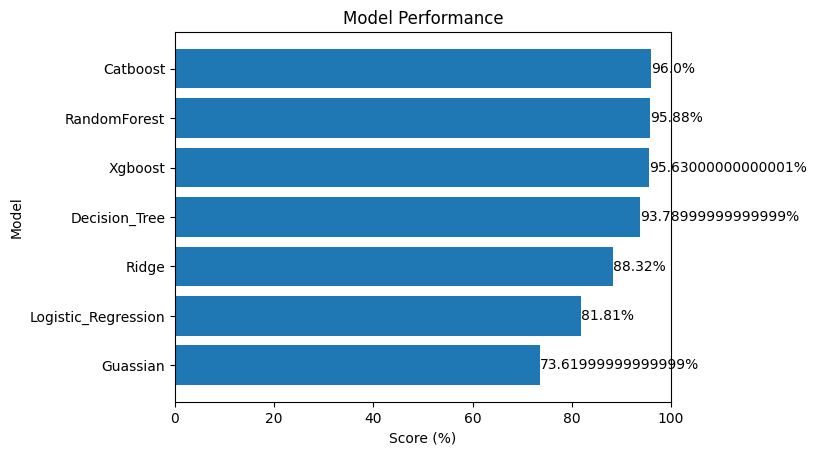

In [80]:
model_performance.sort_values('F1_score', ascending=True, inplace=True)

#plt.figure(figsize=(8, 8))
bars = plt.barh(model_performance['Model'], model_performance['F1_score'])
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width()}%',
        va='center'
    )

plt.xlabel('Score (%)')
plt.ylabel('Model')
plt.title('Model Performance')
plt.xlim(0, 100)

# Show plot
plt.show()

### Confusion Matrix

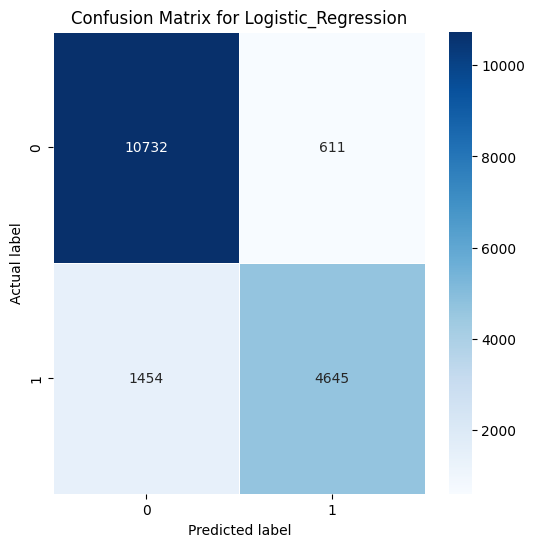

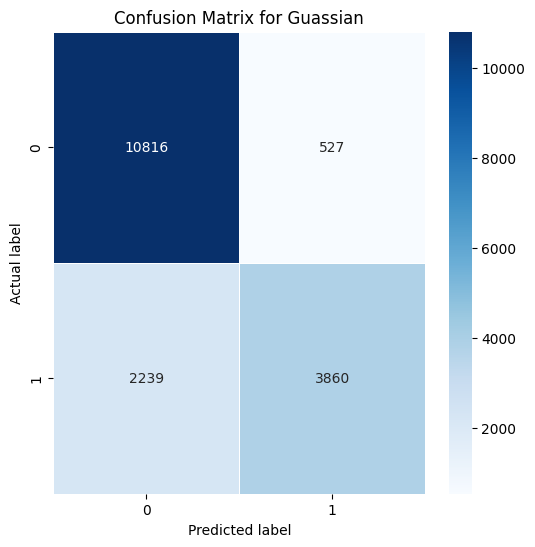

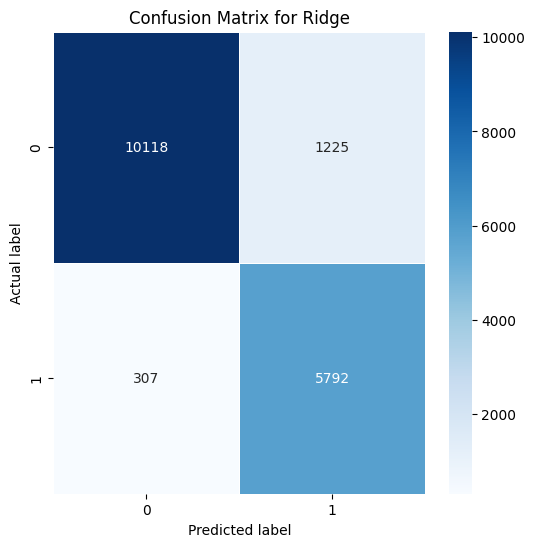

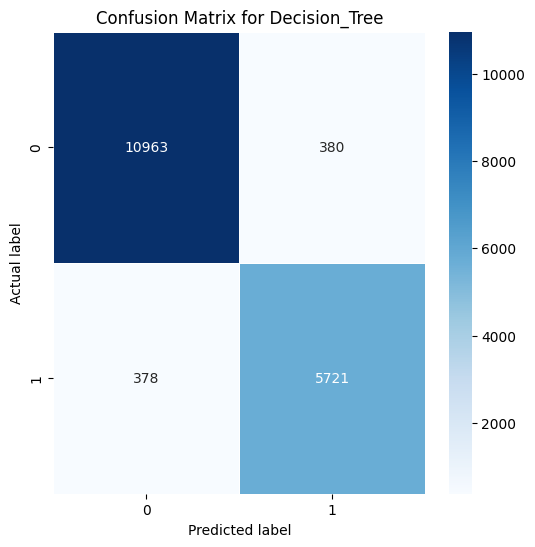

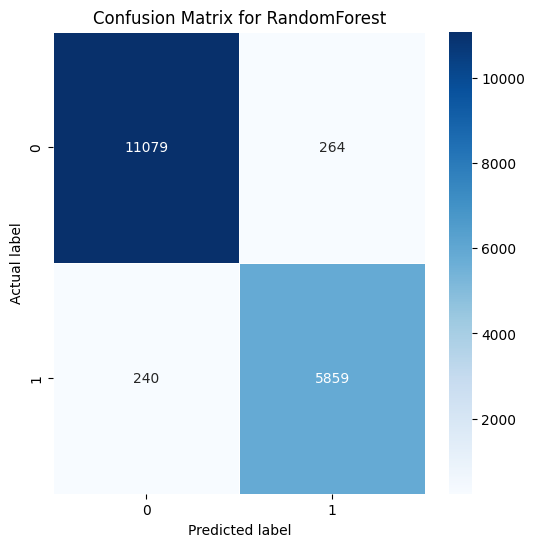

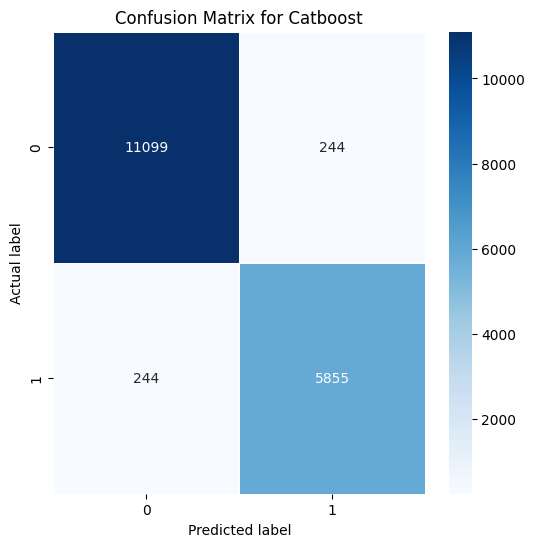

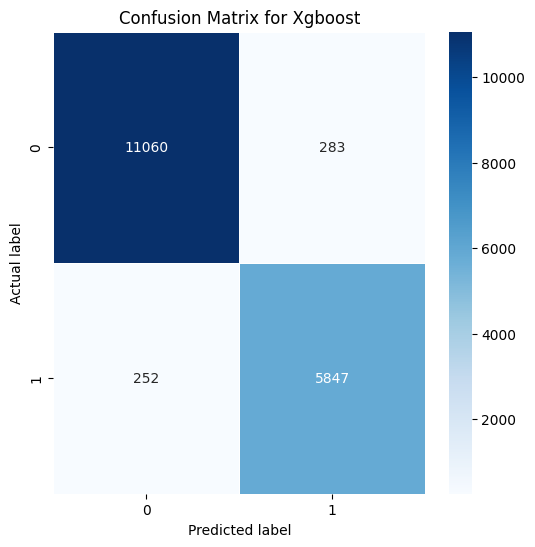

In [81]:
for model, name in zip(ml_models, names):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_valid)
    # Calculate the confusion matrix
    cm = confusion_matrix(y_valid, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

**Observation**

* Catboost is the best machine learning model for identifying the Pishing website, with a 96% F1 score.

### Interpretable Machine Learning

In [82]:
model = CatBoostClassifier(eval_metric='Accuracy', metric_period=20, logging_level='Silent', random_seed=101)

In [83]:
model.fit(X_train, y_train)

In [84]:
explainer = shap.TreeExplainer(model)

In [85]:
shap_values = explainer.shap_values(X_valid)

In [86]:
print('Expected Value:', explainer.expected_value)

Expected Value: -2.636276911821831


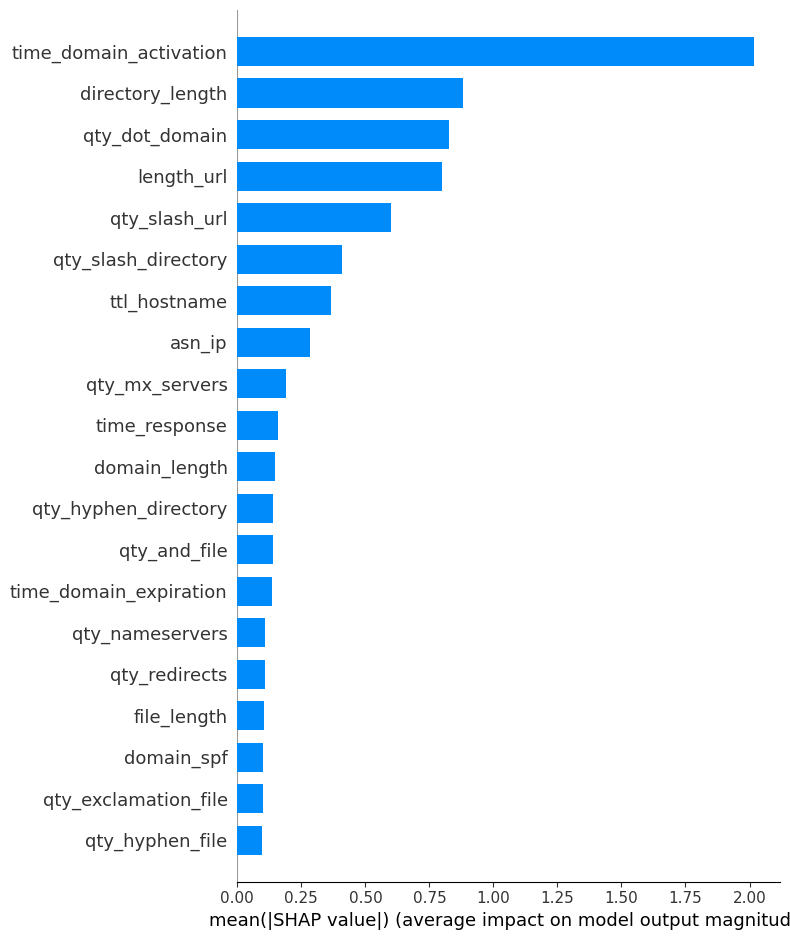

In [87]:
shap.initjs()
shap.summary_plot(shap_values,
                  X_valid, plot_type="bar")

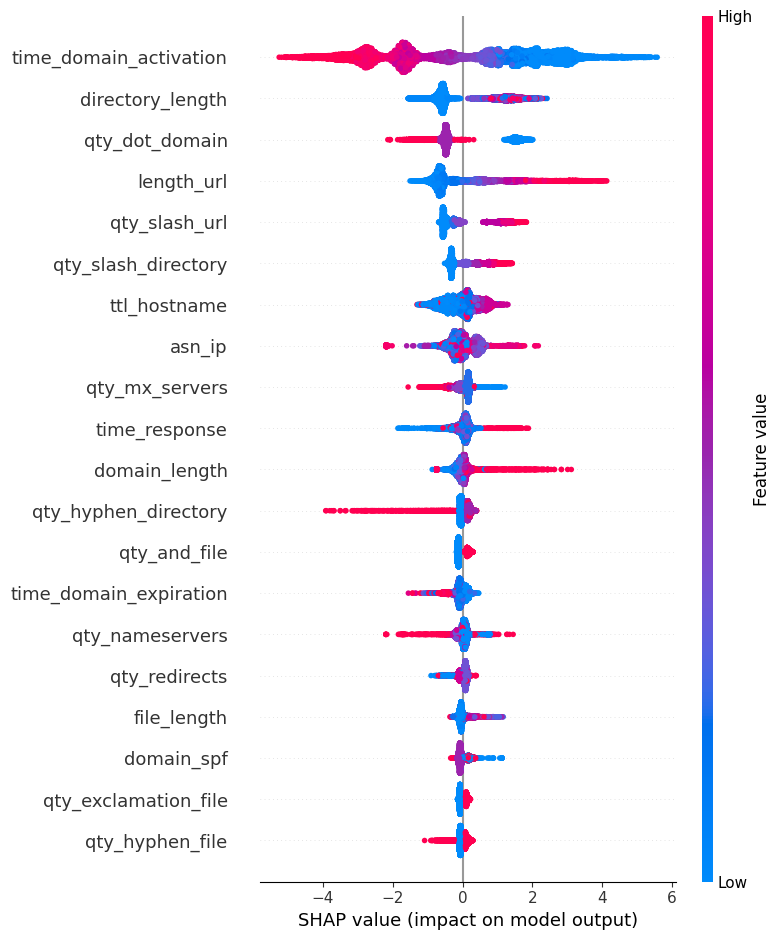

In [88]:
shap.initjs()
shap.summary_plot(shap_values,
                  X_valid, plot_type="dot")